In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [44]:
from sklearn.linear_model import LinearRegression

In [151]:
def load_data(url):
    data=pd.read_csv(url)
    return data

In [154]:
data=load_data(r"C:\Users\91938\Desktop\Top Mentor\Machine Learning\2nd november\File\Multi Linear Regression - Assignment -3_4\3. Multi Linear Regression\50_Startups.csv")
data.shape

(50, 5)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [48]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [49]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [50]:
#Dataset contains 50 records and 5 columns
#Profit is the target variable
#No missing values observed

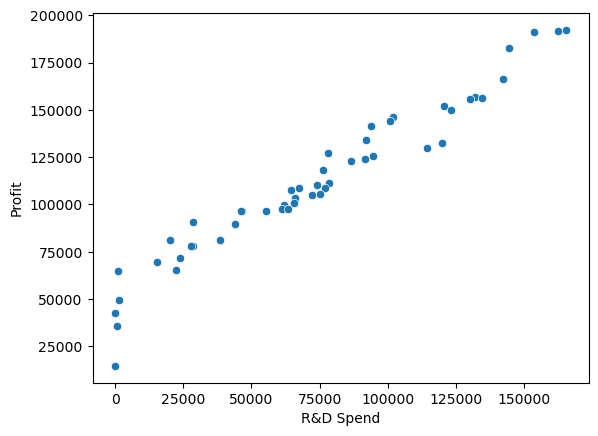

In [51]:
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.show()

In [52]:
#R&D Spend shows a strong positive linear relationship with Profit

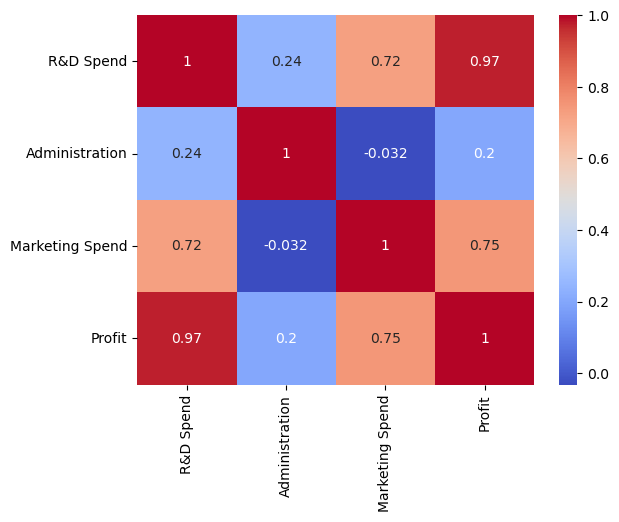

In [53]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [54]:
#R&D Spend has the highest correlation with Profit
#Marketing Spend has moderate correlation
#Administration has weak correlation

In [55]:
# prediction model using multiple linear regrssion

In [56]:
X=data[["R&D Spend","Administration","Marketing Spend"]]

In [57]:
y=data["Profit"]

In [58]:
model1=LinearRegression()
model1.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [61]:
pred1=model1.predict(X_test)

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_1=r2_score(y_test,pred1)

In [64]:
r2_1

0.9709056247619913

In [65]:
# prediction model using KNN regression

In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
for i in range(1,8):
    print(i)
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_profit=knn.predict(X_test)
    acc=r2_score(y_test,pred_profit)
    err=1-acc
    print(err)

1
0.08048573456528152
2
0.04278456748733317
3
0.043848909171716355
4
0.05051170622916901
5
0.04391379689094499
6
0.05120632091389865
7
0.06869697616772674


In [140]:
knn=KNeighborsRegressor(n_neighbors=2)

In [141]:
knn.fit(X_train,y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [142]:
pred_profit=knn.predict(X_test)

In [143]:
r2_4=r2_score(y_test,pred_profit)

In [144]:
r2_4

0.9572154325126668

In [66]:
#Log transformation was applied to Profit to stabilize variance and improve model performance.

In [67]:
import numpy as np

In [68]:
y_log=np.log(y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=1
)

In [70]:
model2=LinearRegression()

In [71]:
model2.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
pred2=model2.predict(X_test)

In [74]:
r2_2=r2_score(y_test,pred2)

In [75]:
r2_2

0.870759621282027

In [76]:
#feature selection

In [78]:
X = data[['R&D Spend']]
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

model3 = LinearRegression()
model3.fit(X_train, y_train)

pred3 = model3.predict(X_test)
r2_3 = r2_score(y_test, pred3)
r2_3


0.9610399086371776

In [145]:
#Since R&D Spend showed the strongest correlation with Profit, a simple linear regression model was created using this feature.

In [147]:
results = pd.DataFrame({
    'Model Name': [
        'Multiple Linear Regression (All Features)',
        'Log Transformed Profit Model',
        'Simple Linear Regression (R&D Spend)',
        'KNN regression'
    ],
    'R2 Score': [
        r2_1,
        r2_2,
        r2_3,
        r2_4
    ]
})

results


,Model Name,R2 Score
0,Multiple Linear Regression (All Features),0.970906
1,Log Transformed Profit Model,0.870760
2,Simple Linear Regression (R&D Spend),0.961040
3,KNN regression,0.957215


In [148]:
#Best model is multiple Linear regression model

In [ ]:
#I performed EDA, applied transformations, built multiple linear regression models, compared them using R², and tracked the entire workflow using Notion.